<a href="https://colab.research.google.com/github/mvharsh/Personality-and-Performance/blob/main/Personality_and_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('PA sample 3.csv')

df = pd.DataFrame(df)


columns_to_drop = ['Timestamp', 'Email address']
df.drop(columns=columns_to_drop, inplace=True)

column_names = df.columns.tolist()

column_names[0] = 'age'
column_names[1] = 'gender'
column_names[2] = 'factor_1'
column_names[3] = 'factor_2'
column_names[4] = 'factor_3'
column_names[5] = 'factor_4'
column_names[6] = 'factor_5'
column_names[7] = 'personality'
column_names[8] = 'cgpa'

df.columns = column_names

df = pd.DataFrame(df)

# Encode categorical variable "personality" using one-hot encoding
df = pd.get_dummies(df, columns=['personality'])

# Map "Female" to 0 and "Male" to 1 in the "gender" column
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
# df3['factor_5'] = df3['factor_5'].map({1: 5, 2: 4, 3: 3, 4: 2, 5: 1})

df.head()


,age,gender,factor_1,factor_2,factor_3,factor_4,factor_5,cgpa,personality_Dependable,personality_Extraverted,personality_Lively,personality_Responsible,personality_Serious
0,19,0,4,5,3,4,3,9.83,0,0,0,1,0
1,19,0,4,4,3,3,3,8.97,0,0,1,0,0
2,19,1,4,4,1,1,3,7.80,1,0,0,0,0
3,18,0,4,4,5,4,3,8.67,0,0,1,0,0
4,19,1,3,4,3,4,4,7.92,0,0,1,0,0


In [ ]:
# Check for missing values
df.isnull().sum()

age                        0
gender                     0
factor_1                   0
factor_2                   0
factor_3                   0
factor_4                   0
factor_5                   0
cgpa                       0
personality_Dependable     0
personality_Extraverted    0
personality_Lively         0
personality_Responsible    0
personality_Serious        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      249 non-null    int64  
 1   gender                   249 non-null    int64  
 2   factor_1                 249 non-null    int64  
 3   factor_2                 249 non-null    int64  
 4   factor_3                 249 non-null    int64  
 5   factor_4                 249 non-null    int64  
 6   factor_5                 249 non-null    int64  
 7   cgpa                     249 non-null    float64
 8   personality_Dependable   249 non-null    uint8  
 9   personality_Extraverted  249 non-null    uint8  
 10  personality_Lively       249 non-null    uint8  
 11  personality_Responsible  249 non-null    uint8  
 12  personality_Serious      249 non-null    uint8  
dtypes: float64(1), int64(7), uint8(5)
memory usage: 16.9 KB


**Hypothetical Testing**

In [ ]:
#HYPOTHESIS TESTING
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('age ~ cgpa', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('gender ~ cgpa', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('factor_1 ~ cgpa', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('factor_2 ~ cgpa', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('factor_3 ~ cgpa', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('factor_4 ~ cgpa', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('factor_5 ~ cgpa', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
cgpa        1.0    1.540840  1.540840  0.572902  0.449829
Residual  247.0  664.314582  2.689533       NaN       NaN
             df     sum_sq   mean_sq         F    PR(>F)
cgpa        1.0   0.958648  0.958648  3.863351  0.050472
Residual  247.0  61.290348  0.248139       NaN       NaN
             df      sum_sq    mean_sq          F        PR(>F)
cgpa        1.0   64.527746  64.527746  53.168705  4.137077e-12
Residual  247.0  299.769443   1.213641        NaN           NaN
             df      sum_sq    mean_sq          F        PR(>F)
cgpa        1.0   70.123474  70.123474  55.793604  1.385103e-12
Residual  247.0  310.438775   1.256837        NaN           NaN
             df      sum_sq   mean_sq         F    PR(>F)
cgpa        1.0    1.804705  1.804705  1.720779  0.190811
Residual  247.0  259.046701  1.048772       NaN       NaN
             df      sum_sq   mean_sq         F    PR(>F)
cgpa        1.0    1.496963  1.496963  

**Feature Selection**

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# create linear regression object
lr = LinearRegression()

# create RFE object with cross-validation
rfe = RFECV(estimator=lr, cv=5, scoring='r2')

# fit RFE to data
X = df[['age','gender','factor_1', 'factor_2', 'factor_3', 'factor_4', 'factor_5']]
y = df['cgpa']
rfe.fit(X, y)

# print selected features
print("Selected Features:")
for i in range(len(X.columns)):
    if rfe.support_[i]:
        print(X.columns[i])


Selected Features:
gender
factor_1
factor_2
factor_5


**Correlation**

In [ ]:
import pandas as pd
correlation_matrix = df[['age','gender','factor_1', 'factor_2', 'factor_3', 'factor_4', 'factor_5','cgpa']].corr()
print(correlation_matrix)

               age    gender  factor_1  factor_2  factor_3  factor_4  \
age       1.000000 -0.019707  0.138214  0.140063  0.064005  0.124417   
gender   -0.019707  1.000000 -0.118384 -0.176231 -0.091114 -0.133484   
factor_1  0.138214 -0.118384  1.000000  0.629567  0.139477  0.187988   
factor_2  0.140063 -0.176231  0.629567  1.000000  0.048577  0.162968   
factor_3  0.064005 -0.091114  0.139477  0.048577  1.000000  0.332218   
factor_4  0.124417 -0.133484  0.187988  0.162968  0.332218  1.000000   
factor_5 -0.021914  0.021568 -0.406406 -0.401487 -0.051869 -0.007979   
cgpa      0.048105 -0.124098  0.420867  0.429258  0.083178  0.082164   

          factor_5      cgpa  
age      -0.021914  0.048105  
gender    0.021568 -0.124098  
factor_1 -0.406406  0.420867  
factor_2 -0.401487  0.429258  
factor_3 -0.051869  0.083178  
factor_4 -0.007979  0.082164  
factor_5  1.000000 -0.484359  
cgpa     -0.484359  1.000000  


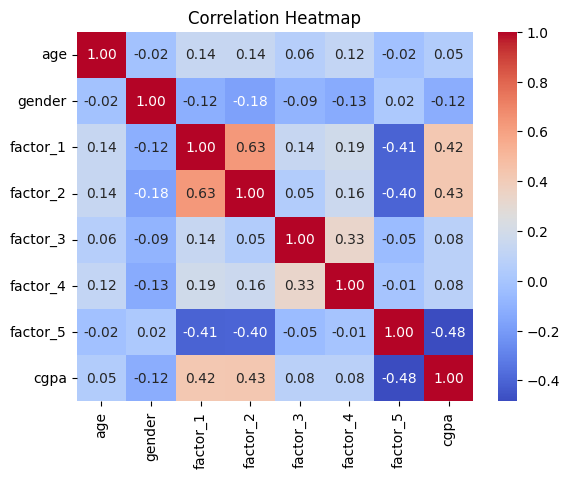

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**VIF**

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# define the predictors and the response variable
X = df.drop('cgpa', axis=1)
y = df['cgpa']

# add a constant term to the predictors to fit the intercept of the linear regression
X = sm.add_constant(X)

# calculate the VIF for each predictor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Predictor"] = X.columns

# print the VIF values
print(vif)


    VIF Factor                Predictor
0     0.000000                    const
1     1.049436                      age
2     1.110789                   gender
3     1.802724                 factor_1
4     1.824517                 factor_2
5     1.230699                 factor_3
6     1.226458                 factor_4
7     1.292193                 factor_5
8          inf   personality_Dependable
9          inf  personality_Extraverted
10         inf       personality_Lively
11         inf  personality_Responsible
12         inf      personality_Serious


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


**Regression**

In [ ]:
import statsmodels.api as sm

# Build a linear regression model with CGPA as the dependent variable and the five factors as the independent variables
X = df[['factor_1', 'factor_2', 'factor_5']]
y = df['cgpa']
X = sm.add_constant(X)  # Add a constant term to the model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   cgpa   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     37.64
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           4.83e-20
Time:                        16:53:12   Log-Likelihood:                -300.20
No. Observations:                 249   AIC:                             608.4
Df Residuals:                     245   BIC:                             622.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9776      0.285     28.003      0.0

**Residuals**

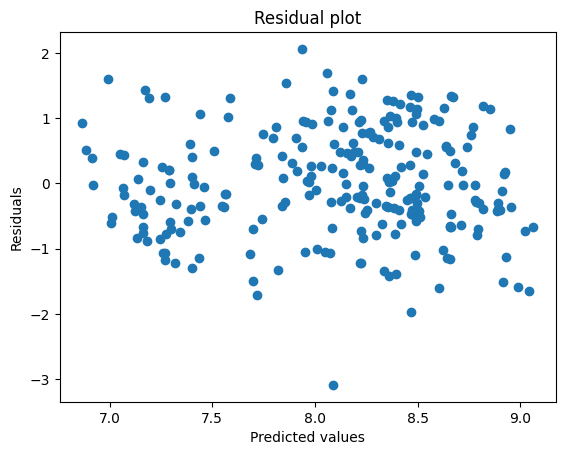

In [ ]:
import matplotlib.pyplot as plt

# Fit the linear regression model and predict the response
X = df[['age', 'gender', 'factor_1', 'factor_2', 'factor_3', 'factor_4', 'factor_5']]
y = df['cgpa']
model = sm.OLS(y, sm.add_constant(X)).fit()
pred = model.predict()

# Plot the residuals against the predicted values
residuals = y - pred
plt.scatter(pred, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()


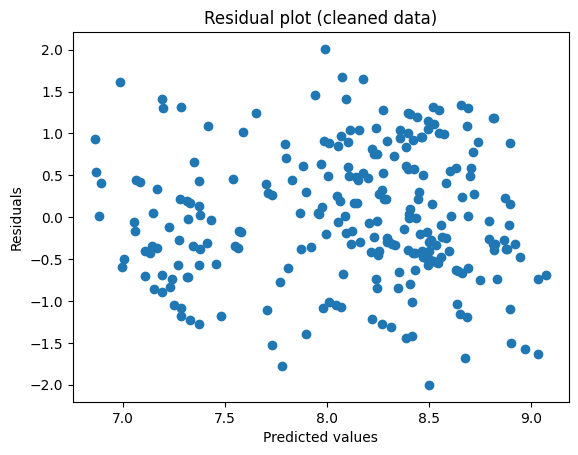

In [ ]:
# Identify outlier index
outlier_idx = np.argmax(np.abs(residuals))

# Remove outlier row from X and y dataframes
X_clean = X.drop(outlier_idx, axis=0)
y_clean = y.drop(outlier_idx)

# Fit the linear regression model with cleaned data and predict the response
model_clean = sm.OLS(y_clean, sm.add_constant(X_clean)).fit()
pred_clean = model_clean.predict(sm.add_constant(X_clean))

# Plot the residuals against the predicted values for cleaned data
residuals_clean = y_clean - pred_clean
plt.scatter(pred_clean, residuals_clean)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot (cleaned data)')
plt.show()


In [ ]:


# Regression with cleaned data
model = sm.OLS(y_clean, X_clean).fit()

# Print the summary of the regression model
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                   cgpa   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              2245.
Date:                Sun, 30 Apr 2023   Prob (F-statistic):                   1.84e-215
Time:                        16:53:13   Log-Likelihood:                         -352.70
No. Observations:                 248   AIC:                                      719.4
Df Residuals:                     241   BIC:                                      744.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
model = sm.OLS(y_clean, X_clean[['factor_1','factor_2','factor_5']]).fit()

# Print the summary of the regression model
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                   cgpa   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              2029.
Date:                Sun, 30 Apr 2023   Prob (F-statistic):                   1.22e-172
Time:                        16:53:13   Log-Likelihood:                         -469.36
No. Observations:                 248   AIC:                                      944.7
Df Residuals:                     245   BIC:                                      955.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# define the predictors and the response variable
X = X_clean
y = y_clean

# add a constant term to the predictors to fit the intercept of the linear regression
X = sm.add_constant(X)

# calculate the VIF for each predictor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Predictor"] = X.columns

# print the VIF values
print(vif)


   VIF Factor Predictor
0  162.318504     const
1    1.037427       age
2    1.048203    gender
3    1.787989  factor_1
4    1.792783  factor_2
5    1.143173  factor_3
6    1.187287  factor_4
7    1.286367  factor_5


Linear Regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Make sure X and y have the same number of rows
assert X_clean.shape[0] == y_clean.shape[0]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Fit a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Assuming y_true and y_pred are the true and predicted values, respectively
linear_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", linear_mse)


Mean Squared Error (MSE): 0.8476580497084814


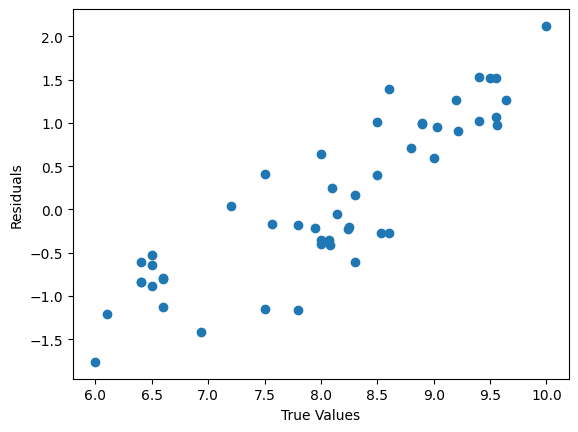

In [ ]:
import matplotlib.pyplot as plt

# Plot the residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()


Lasso and Ridge Regression

In [ ]:
# Import the necessary libraries
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = X_clean[['factor_1','factor_2','factor_5']]
y = y_clean

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge and Lasso regression models
ridge = Ridge(alpha=0.5)
lasso = Lasso(alpha=0.5)

# Train the models on the training data
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Calculate the mean squared error of the predictions
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print("Ridge MSE:", ridge_mse)
print("Lasso MSE:", lasso_mse)


Ridge MSE: 0.8181638358032178
Lasso MSE: 1.1389878836201321


Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X = X_clean[['factor_1','factor_2','factor_5']]
y = y_clean

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the mean squared error of the model
rf_mse = mean_squared_error(y_test, y_pred)
print("Random Forest MSE:", rf_mse)


Random Forest MSE: 0.8724527294311478


Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Splitting the data into features (X) and target (y)
X = X_clean[['factor_1','factor_2','factor_5']]
y = y_clean

# Creating a decision tree regressor with default parameters
dt = DecisionTreeRegressor()

# Fitting the model to the training data
dt.fit(X_train, y_train)

# Predicting on the test data
y_pred = dt.predict(X_test)

# Calculating the mean squared error
dt_mse = mean_squared_error(y_test, y_pred)

print("Decision Tree MSE:", dt_mse)


Decision Tree MSE: 1.0576621443969747


Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Splitting the data into features (X) and target (y)
X = X_clean[['factor_1','factor_2','factor_5']]
y = y_clean

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Creating an SVR model with default parameters
svr = SVR()

# Fitting the model to the training data
svr.fit(X_train, y_train)

# Predicting on the test data
y_pred = svr.predict(X_test)

# Calculating the mean squared error
svr_mse = mean_squared_error(y_test, y_pred)

print("SVR MSE:", svr_mse)


SVR MSE: 0.6957606469747354


ElasticNet regression 

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Create ElasticNet model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit model on training data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate MSE
elastic_mse = mean_squared_error(y_test, y_pred)
print("ElasticNet MSE:", elastic_mse)


ElasticNet MSE: 0.8330723433040644


Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the data into features (X) and target (y)
X = X_clean[['factor_1','factor_2','factor_5']]
y = y_clean

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# evaluate the model
y_pred = model.predict(X_test)
gb_mse = mean_squared_error(y_test, y_pred)
print("MSE:", gb_mse)


MSE: 0.7520677620371213


Neural Network Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Splitting the data into features (X) and target (y)
X = X_clean[['factor_1','factor_2','factor_5']]
y = y_clean

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate model
nn_mse = model.evaluate(X_test, y_test)
print("Neural Network MSE:", nn_mse)


Epoch 1/100
5/5 [==============================] - 1s 96ms/step - loss: 62.5873 - val_loss: 60.1247
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 59.4256 - val_loss: 56.6843
Epoch 3/100
5/5 [==============================] - 0s 22ms/step - loss: 56.0385 - val_loss: 52.8211
Epoch 4/100
5/5 [==============================] - 0s 22ms/step - loss: 52.2952 - val_loss: 48.6571
Epoch 5/100
5/5 [==============================] - 0s 19ms/step - loss: 48.2515 - val_loss: 44.2513
Epoch 6/100
5/5 [==============================] - 0s 22ms/step - loss: 44.0053 - val_loss: 39.5917
Epoch 7/100
5/5 [==============================] - 0s 19ms/step - loss: 39.4100 - val_loss: 34.7061
Epoch 8/100
5/5 [==============================] - 0s 18ms/step - loss: 34.7308 - val_loss: 29.6716
Epoch 9/100
5/5 [==============================] - 0s 20ms/step - loss: 29.8594 - val_loss: 24.6822
Epoch 10/100
5/5 [==============================] - 0s 21ms/step - loss: 25.0924 - val_loss: 19.9210

K-Nearest Neighbors Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Splitting the data into features (X) and target (y)
X = X_clean[['factor_1','factor_2','factor_5']]
y = y_clean

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predicting the test set
y_pred = knn_model.predict(X_test)

# Calculating the mean squared error
knn_mse = mean_squared_error(y_test, y_pred)
print('KNN MSE:', knn_mse)


KNN MSE: 0.8204515200000003


Gaussian Process Regression

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Splitting the data into features (X) and target (y)
X = X_clean[['factor_1','factor_2','factor_5']]
y = y_clean

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define Gaussian Process Regressor with RBF kernel
kernel = RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, normalize_y=True)

# fit model on training data
gpr.fit(X_train, y_train)

# predict on testing data and calculate MSE
y_pred = gpr.predict(X_test)
gauss_mse = mean_squared_error(y_test, y_pred)
print("MSE:", gauss_mse)


MSE: 0.9230068222426783


Bayesian Regression

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error

# Splitting the data into features (X) and target (y)
X = X_clean[['factor_1','factor_2','factor_5']]
y = y_clean

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = BayesianRidge()
model.fit(X_train, y_train)

# Make predictions and calculate MSE
y_pred = model.predict(X_test)
bayesian_mse = mean_squared_error(y_test, y_pred)

print("Bayesian Regression MSE:", bayesian_mse)


Bayesian Regression MSE: 0.817035380044785


Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X_clean[['factor_1','factor_2','factor_5']]
y = y_clean

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the degree of polynomial
degree = 2

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_train)

# Fit the model using Linear Regression
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

# Predict the test set results
y_pred = regressor.predict(poly.transform(X_test))

# Calculate the MSE
poly_mse = mean_squared_error(y_test, y_pred)

print("Polynomial Regression MSE:", poly_mse)


Polynomial Regression MSE: 0.7193480434484103


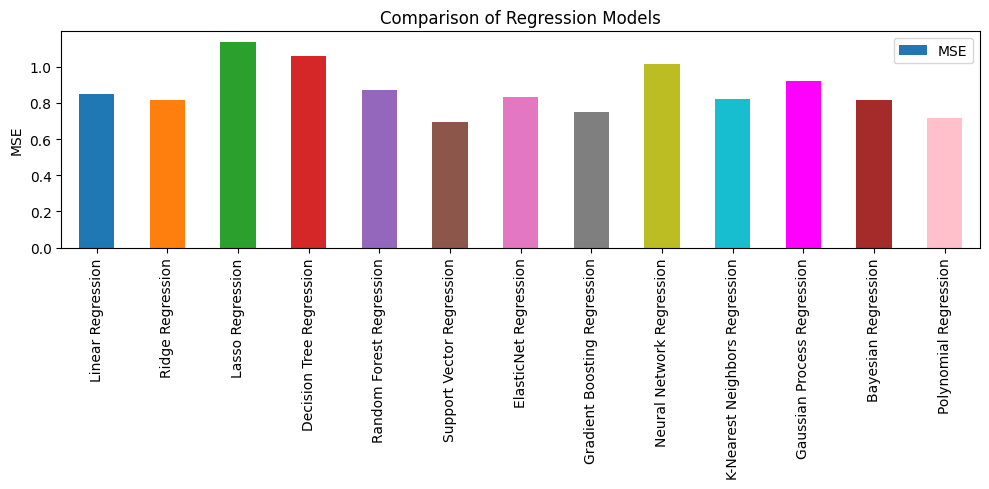

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dictionary to store the MSE values for each regression model
mse_dict = {'Linear Regression': linear_mse, 
            'Ridge Regression': ridge_mse,
            'Lasso Regression': lasso_mse,
            'Decision Tree Regression': dt_mse,
            'Random Forest Regression': rf_mse,
            'Support Vector Regression': svr_mse,
            'ElasticNet Regression': elastic_mse,
            'Gradient Boosting Regression': gb_mse,
            'Neural Network Regression': nn_mse,
            'K-Nearest Neighbors Regression': knn_mse,
            'Gaussian Process Regression': gauss_mse,
            'Bayesian Regression': bayesian_mse,
            'Polynomial Regression': poly_mse}

# Convert the dictionary to a pandas dataframe
mse_df = pd.DataFrame.from_dict(mse_dict, orient='index', columns=['MSE'])

# Define the colors for the bars
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
          'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'magenta', 'brown', 'pink']

# Plot the MSE values as a spaced bar graph with color
fig, ax = plt.subplots(figsize=(10, 5))
mse_df.plot(kind='bar', y='MSE', ax=ax, width=0.5, align='center', color=colors)
ax.set_ylabel('MSE')
ax.set_title('Comparison of Regression Models')
plt.tight_layout()
plt.show()

In [ ]:
mse_series = pd.Series(mse_dict)
print(mse_series)

Linear Regression                 0.847658
Ridge Regression                  0.818164
Lasso Regression                  1.138988
Decision Tree Regression          1.057662
Random Forest Regression          0.872453
Support Vector Regression         0.695761
ElasticNet Regression             0.833072
Gradient Boosting Regression      0.752068
Neural Network Regression         1.014462
K-Nearest Neighbors Regression    0.820452
Gaussian Process Regression       0.923007
Bayesian Regression               0.817035
Polynomial Regression             0.719348
dtype: float64
